In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
# assign FEATURES to variable x
x = iris.data
# assign LABELS of FEATURES to variable y
y = iris.target

## Using K-Nearest Neighbor (KNN)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)

In [7]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
knn5.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
a = knn.predict([[3,5,4,2]])
if a[0] == 0: print("setosa")
elif a[0] == 1: print("versicolor")
else: print("virginica")

virginica


In [10]:
a = knn5.predict([[3,5,4,2]])
if a[0] == 0: print("setosa")
elif a[0] == 1: print("versicolor")
else: print("virginica")

versicolor


## Using Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
lr.predict([[3,5,4,2]])
if a[0] == 0: print("setosa")
elif a[0] == 1: print("versicolor")
else: print("virginica")

versicolor


In [13]:
ypred = lr.predict(x)

In [14]:
# ypred classication accuracy
# compared TRUE responses to PREDICTED responses
# aka training accuracy (testing model with exact same training data)
from sklearn import metrics
print (metrics.accuracy_score(y,ypred))

0.96


In [15]:
ypred = knn5.predict(x)
print(metrics.accuracy_score(y,ypred))

0.9666666666666667


In [16]:
#OVERFIT (learned data noise; does not generalize for out-of-sample data)
ypred = knn.predict(x)
print(metrics.accuracy_score(y,ypred))

1.0


## Using Train-Test split

In [17]:
# 1. split x y training and testing sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.4)

In [18]:
print(xtrain.shape)
print(xtest.shape)

(90, 4)
(60, 4)


In [19]:
# 2. train the training set
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# 3. predict on testing set
ypred = lr.predict(xtest)
# compare TRUE values with PREDICTED values
print(metrics.accuracy_score(ytest,ypred))

0.9333333333333333


In [21]:
#KNN (n=5) with Train-test split
knn5.fit(xtrain,ytrain)
ypred = knn5.predict(xtest)
print(metrics.accuracy_score(ytest,ypred))

0.95


In [22]:
#KNN (n=1) with Train-test split
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(metrics.accuracy_score(ytest,ypred))

0.95


In [30]:
#Looking for best K value without OVERFITTING
Krange = list(range(1,26))
score = []
for k in Krange:
    knnTmp = KNeighborsClassifier(n_neighbors=k)
    knnTmp.fit(xtrain,ytrain)
    ypredT = knnTmp.predict(xtest)
    score.append(metrics.accuracy_score(ytest,ypredT))

In [26]:
print(score)

[0.95, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.95, 0.9333333333333333, 0.95, 0.9333333333333333, 0.9666666666666667, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95, 0.95, 0.95, 0.9333333333333333, 0.95]


Text(0,0.5,'Accuracy')

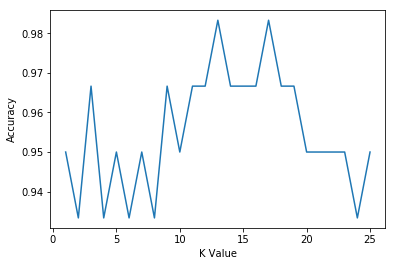

In [31]:
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Krange,score)
plt.xlabel("K Value")
plt.ylabel("Accuracy")

In [34]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x,y)
a = knn.predict([[3,5,4,2]])
if a[0] == 0: print("setosa")
elif a[0] == 1: print("versicolor")
else: print("virginica")

versicolor


## Using cross-validation

In [38]:
# Cross-validation
# finding hyperparameter
from sklearn.model_selection import cross_val_score

In [39]:
#K-fold Cross validation (10-fold)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [40]:
# average accuracy as estimate for out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [42]:
#finding optimal value for K
krange = list(range(1,31))
kscores = []
for k in krange:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    kscores.append(scores.mean())
print(kscores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross Validated accuracy')

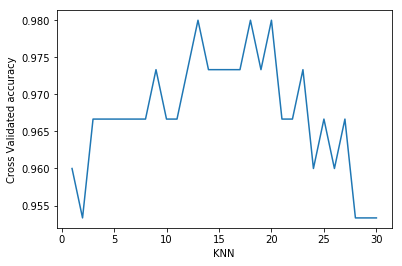

In [43]:
plt.plot(krange,kscores)
plt.xlabel('KNN')
plt.ylabel('Cross Validated accuracy')

## Comparing KNN model vs Logistic Regression

In [46]:
# 10 Fold KNN model (using best K value)
knn = KNeighborsClassifier(n_neighbors=15)
print(cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean())

0.9733333333333334


In [47]:
# 10 Fold Logistic Reg.
lr = LogisticRegression()
print(cross_val_score(lr,x,y,cv=10,scoring='accuracy').mean())

0.9533333333333334


## Therefore, 10-Fold KNN w/ K=15 is better predictor than Logistic Regression for the Iris data set

In [51]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x,y)
a = knn.predict([[3,5,4,2]])
if a[0] == 0: print("setosa")
elif a[0] == 1: print("versicolor")
else: print("virginica")

versicolor
